## Important Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker)
from matplotlib.patches import Arc
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.image as image
from matplotlib.colors import (to_rgba, LinearSegmentedColormap)
import matplotlib.patheffects as path_effects
from scipy.ndimage import gaussian_filter

# I want that my dataframes show all the columns
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

pitch = Pitch()

# fontmanager for google font (robotto)
robotto_regular = FontManager()

# path effects
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()]

# see the custom colormaps example for more ideas on setting colormaps
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

## Import the dataset from Statsbomb file (json)

In [2]:
competition = pd.read_json('open-data/data/competitions.json')
competition

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


Get Champions League data.

In [3]:
# Get the Champions League
Champions = competition[competition.competition_name == 'Champions League']
Champions

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


From this dataset, we identify the 2003/2004 Champions League by the competition id 16 and the season id of 44.

In [4]:
with open('open-data/data/matches/16/44.json') as P:
    data = json.load(P)

data

[{'match_id': 3752619,
  'match_date': '2004-05-26',
  'kick_off': None,
  'competition': {'competition_id': 16,
   'country_name': 'Europe',
   'competition_name': 'Champions League'},
  'season': {'season_id': 44, 'season_name': '2003/2004'},
  'home_team': {'home_team_id': 129,
   'home_team_name': 'AS Monaco',
   'home_team_gender': 'male',
   'home_team_group': None,
   'country': {'id': 150, 'name': 'Monaco'}},
  'away_team': {'away_team_id': 256,
   'away_team_name': 'FC Porto',
   'away_team_gender': 'male',
   'away_team_group': None,
   'country': {'id': 183, 'name': 'Portugal'}},
  'home_score': 0,
  'away_score': 3,
  'match_status': 'available',
  'match_status_360': 'scheduled',
  'last_updated': '2020-07-29T05:00',
  'last_updated_360': '2021-06-13T16:17:31.694',
  'metadata': {'data_version': '1.1.0',
   'shot_fidelity_version': '2',
   'xy_fidelity_version': '2'},
  'match_week': 1,
  'competition_stage': {'id': 26, 'name': 'Final'},
  'stadium': {'id': 370,
   'name':

From here, we get all the games available from this competition.

In [5]:
with open('open-data/data/matches/16/44.json') as P:
    data = json.load(P)
    for i in data:
        print('ID:', i['match_id'], i['home_team']['home_team_name'], i['home_score'], 
              '-', i['away_score'], i['away_team']['away_team_name'])

ID: 3752619 AS Monaco 0 - 3 FC Porto


Since only the final is available from this edition of the Champions League, let's get the final with its event ID 3753619.

In [6]:
with open('open-data/data/events/3752619.json') as P:
    PorMon = json.load(P)

PorMon

[{'id': 'c2e5fcee-c26e-4d24-a2b0-a421f289d857',
  'index': 1,
  'period': 1,
  'timestamp': '00:00:00.000',
  'minute': 0,
  'second': 0,
  'type': {'id': 35, 'name': 'Starting XI'},
  'possession': 1,
  'possession_team': {'id': 129, 'name': 'AS Monaco'},
  'play_pattern': {'id': 1, 'name': 'Regular Play'},
  'team': {'id': 129, 'name': 'AS Monaco'},
  'duration': 0.0,
  'tactics': {'formation': 433,
   'lineup': [{'player': {'id': 40841, 'name': 'Flavio Roma'},
     'position': {'id': 1, 'name': 'Goalkeeper'},
     'jersey_number': 30},
    {'player': {'id': 26140, 'name': 'Hugo BenjamÃ\xadn Ibarra'},
     'position': {'id': 2, 'name': 'Right Back'},
     'jersey_number': 4},
    {'player': {'id': 40843, 'name': 'Julien Rodriguez'},
     'position': {'id': 3, 'name': 'Right Center Back'},
     'jersey_number': 27},
    {'player': {'id': 40842, 'name': 'GaÃ«l Givet-Viaros'},
     'position': {'id': 5, 'name': 'Left Center Back'},
     'jersey_number': 32},
    {'player': {'id': 20008,

Now let's normalize this dataset to a more common table.

In [7]:
df = pd.json_normalize(PorMon, sep = '_').assign(match_id = "3752619")
df.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,dribble_outcome_id,dribble_outcome_name,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,pass_switch,off_camera,out,clearance_right_foot,clearance_body_part_id,clearance_body_part_name,counterpress,pass_aerial_won,interception_outcome_id,interception_outcome_name,ball_recovery_recovery_failure,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_lost_in_play,goalkeeper_outcome_id,goalkeeper_outcome_name,shot_statsbomb_xg,shot_end_location,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,foul_won_defensive,pass_cross,clearance_head,dribble_overrun,ball_recovery_offensive,shot_first_time,block_deflection,clearance_aerial_won,pass_through_ball,pass_technique_id,pass_technique_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,dribble_nutmeg,miscontrol_aerial_won,foul_committed_card_id,foul_committed_card_name,pass_inswinging,pass_outswinging,foul_committed_advantage,foul_won_advantage,pass_assisted_shot_id,pass_goal_assist,shot_key_pass_id,goalkeeper_technique_id,goalkeeper_technique_name,bad_behaviour_card_id,bad_behaviour_card_name,foul_committed_offensive,foul_committed_type_id,foul_committed_type_name,clearance_left_foot,pass_shot_assist,shot_aerial_won,pass_cut_back,injury_stoppage_in_chain,match_id
0,c2e5fcee-c26e-4d24-a2b0-a421f289d857,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,129,AS Monaco,1,Regular Play,129,AS Monaco,433.0,"[{'player': {'id': 40841, 'name': 'Flavio Roma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3752619
1,9135af50-8ca2-43a9-bd50-92bc46a121c5,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,129,AS Monaco,1,Regular Play,256,FC Porto,41212.0,"[{'player': {'id': 15009, 'name': 'VÃ­tor Manu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3752619
2,58ee620f-f8e0-43fd-a7f4-6ff3fcd66979,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,129,AS Monaco,1,Regular Play,129,AS Monaco,NaN,NaN,[ba0d55e0-a9ef-44e8-8538-e185e3aae628],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3752619
3,ba0d55e0-a9ef-44e8-8538-e185e3aae628,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,129,AS Monaco,1,Regular Play,256,FC Porto,NaN,NaN,[58ee620f-f8e0-43fd-a7f4-6ff3fcd66979],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Personalised function to create a football pitch

In [8]:
def createPitch(length, width, unity, linecolor): # in meters
    # Code by @JPJ_dejong

    """
    creates a plot in which the 'length' is the length of the pitch (goal to goal).
    And 'width' is the width of the pitch (sideline to sideline). 
    Fill in the unity in meters or in yards.
    """
    #Set unity
    if unity == "meters":
        # Set boundaries
        if length >= 120.5 or width >= 75.5:
            return(str("Field dimensions are too big for meters as unity, didn't you mean yards as unity?\
                       Otherwise the maximum length is 120 meters and the maximum width is 75 meters. Please try again"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1, 1, 1)
           
            #Pitch Outline & Centre Line
            plt.plot([0, 0], [0, width], color = linecolor)
            plt.plot([0, length], [width, width], color = linecolor)
            plt.plot([length, length], [width, 0], color = linecolor)
            plt.plot([length, 0], [0, 0], color = linecolor)
            plt.plot([length/2, length/2], [0, width], color = linecolor)
            
            #Left Penalty Area
            plt.plot([16.5, 16.5], [(width/2 + 16.5) , (width/2 - 16.5)], color = linecolor)
            plt.plot([0, 16.5], [(width/2 + 16.5), (width/2 + 16.5)], color = linecolor)
            plt.plot([16.5, 0], [(width/2 - 16.5), (width/2 - 16.5)], color = linecolor)
            
            #Right Penalty Area
            plt.plot([(length - 16.5), length], [(width/2 + 16.5), (width/2 + 16.5)], color = linecolor)
            plt.plot([(length - 16.5), (length - 16.5)], [(width/2 + 16.5), (width/2 - 16.5)], color = linecolor)
            plt.plot([(length - 16.5), length], [(width/2 - 16.5), (width/2 - 16.5)], color = linecolor)
            
            #Left 5-meters Box
            plt.plot([0, 5.5], [(width/2 + 7.32/2 + 5.5), (width/2 + 7.32/2 + 5.5)], color = linecolor)
            plt.plot([5.5, 5.5], [(width/2 + 7.32/2 + 5.5), (width/2 - 7.32/2 - 5.5)], color = linecolor)
            plt.plot([5.5, 0.5], [(width/2 - 7.32/2 - 5.5), (width/2 - 7.32/2 - 5.5)], color = linecolor)
            
            #Right 5 -eters Box
            plt.plot([length, length - 5.5], [(width/2 + 7.32/2+ 5.5), (width/2 + 7.32/2 + 5.5)], color = linecolor)
            plt.plot([length - 5.5, length - 5.5], [(width/2 + 7.32/2 + 5.5), width/2 - 7.32/2 - 5.5], color = linecolor)
            plt.plot([length - 5.5, length], [width/2 - 7.32/2 - 5.5, width/2 - 7.32/2 - 5.5], color = linecolor)
            
            #Prepare Circles
            centreCircle = plt.Circle((length/2, width/2), 9.15, color = linecolor, fill = False)
            centreSpot = plt.Circle((length/2, width/2), 0.8, color = linecolor)
            leftPenSpot = plt.Circle((11, width/2), 0.8, color = linecolor)
            rightPenSpot = plt.Circle((length - 11, width/2), 0.8, color = linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11, width/2), height = 18.3, width = 18.3, angle = 0,
                          theta1 = 308, theta2 = 52, color = linecolor)
            rightArc = Arc((length - 11, width/2), height = 18.3, width = 18.3 ,angle = 0,
                           theta1 = 128, theta2 = 232, color = linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
            #Axis titles

    #check unity again
    elif unity == "yards":
        #check boundaries again
        if length <= 95:
            return(str("Didn't you mean meters as unity?"))
        elif length >= 131 or width >= 101:
            return(str("Field dimensions are too big. Maximum length is 130, maximum width is 100"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1, 1, 1)
           
            #Pitch Outline & Centre Line
            plt.plot([0, 0], [0, width], color = linecolor)
            plt.plot([0, length], [width, width], color = linecolor)
            plt.plot([length, length], [width, 0], color = linecolor)
            plt.plot([length, 0], [0, 0], color = linecolor)
            plt.plot([length/2, length/2], [0, width], color = linecolor)
            
            #Left Penalty Area
            plt.plot([18, 18], [(width/2 + 18), (width/2 - 18)], color = linecolor)
            plt.plot([0, 18], [(width/2 + 18), (width/2 + 18)], color = linecolor)
            plt.plot([18, 0], [(width/2 - 18), (width/2 - 18)], color = linecolor)
            
            #Right Penalty Area
            plt.plot([(length - 18), length], [(width/2 + 18), (width/2 + 18)], color = linecolor)
            plt.plot([(length - 18), (length - 18)], [(width/2 + 18), (width/2 - 18)],color = linecolor)
            plt.plot([(length - 18), length], [(width/2 - 18), (width/2 - 18)], color = linecolor)
            
            #Left 6-yard Box
            plt.plot([0, 6], [(width/2 + 7.32/2 + 6), (width/2 + 7.32/2 + 6)], color = linecolor)
            plt.plot([6, 6], [(width/2 + 7.32/2 + 6), (width/2 - 7.32/2 - 6)], color = linecolor)
            plt.plot([6, 0], [(width/2 - 7.32/2 - 6), (width/2 - 7.32/2 - 6)], color = linecolor)
            
            #Right 6-yard Box
            plt.plot([length, length - 6], [(width/2 + 7.32/2 + 6), (width/2 + 7.32/2 + 6)], color = linecolor)
            plt.plot([length - 6,length - 6],[(width/2 + 7.32/2 + 6), width/2 - 7.32/2 - 6], color = linecolor)
            plt.plot([length - 6, length], [(width/2 - 7.32/2 - 6), width/2 - 7.32/2 - 6], color = linecolor)
            
            #Prepare Circles; 10 yards distance. penalty on 12 yards
            centreCircle = plt.Circle((length/2, width/2), 10, color = linecolor, fill = False)
            centreSpot = plt.Circle((length/2, width/2), 0.8, color = linecolor)
            leftPenSpot = plt.Circle((12, width/2), 0.8, color = linecolor)
            rightPenSpot = plt.Circle((length - 12, width/2), 0.8, color = linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11 ,width/2), height = 20, width = 20, angle = 0,
                          theta1 = 312, theta2 = 48, color = linecolor)
            rightArc = Arc((length - 11, width/2), height = 20 , width = 20, angle = 0, 
                           theta1 = 130, theta2 = 230, color = linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
                
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax


## Shot Analysis - Part 2

Let's select the whole data related to shots.

In [9]:
shots = df[df.type_name == 'Shot'].set_index('id')
shots.head()

,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,dribble_outcome_id,dribble_outcome_name,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,pass_switch,off_camera,out,clearance_right_foot,clearance_body_part_id,clearance_body_part_name,counterpress,pass_aerial_won,interception_outcome_id,interception_outcome_name,ball_recovery_recovery_failure,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_lost_in_play,goalkeeper_outcome_id,goalkeeper_outcome_name,shot_statsbomb_xg,shot_end_location,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,foul_won_defensive,pass_cross,clearance_head,dribble_overrun,ball_recovery_offensive,shot_first_time,block_deflection,clearance_aerial_won,pass_through_ball,pass_technique_id,pass_technique_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,dribble_nutmeg,miscontrol_aerial_won,foul_committed_card_id,foul_committed_card_name,pass_inswinging,pass_outswinging,foul_committed_advantage,foul_won_advantage,pass_assisted_shot_id,pass_goal_assist,shot_key_pass_id,goalkeeper_technique_id,goalkeeper_technique_name,bad_behaviour_card_id,bad_behaviour_card_name,foul_committed_offensive,foul_committed_type_id,foul_committed_type_name,clearance_left_foot,pass_shot_assist,shot_aerial_won,pass_cut_back,injury_stoppage_in_chain,match_id
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4855e5fb-2f78-4f0e-b87a-bc51af23021b,120,1,00:02:22.356,2,22,11,0.995283,16,Shot,129,AS Monaco,1,Regular Play,129,AS Monaco,NaN,NaN,"[3ced230b-8afd-46eb-aecd-e00cc7110b3f, 7fff6b4...","[102.8, 56.8]",40844.0,Edouard CissÃ©,13.0,Right Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030982,"[120.0, 32.8, 5.6]",38.0,Left Foot,87.0,Open Play,98.0,Off T,93.0,Normal,"[{'location': [107.8, 36.7], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3752619
015f91d8-4a0f-4544-8588-9deb8e92ed0b,284,1,00:06:45.556,6,45,20,0.542239,16,Shot,256,FC Porto,3,From Free Kick,256,FC Porto,NaN,NaN,"[336f37cb-ed2a-4df1-a4c7-352cd70a8ce7, 52a3e01...","[101.9, 53.2]",19757.0,Anderson LuÃ­s de Souza,19.0,Center Attacking Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011000,"[112.9, 43.6]",40.0,Right Foot,87.0,Open Play,96.0,Blocked,91.0,Half Volley,"[{'location': [114.1, 32.1], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3752619
dba87c72-d73a-484b-955b-c147e553c335,1442,1,00:38:44.169,38,44,96,0.991317,16,Shot,256,FC Porto,3,From Free Kick,256,FC Porto,NaN,NaN,[d9eb7db2-45a4-43f4-8fe4-59742bb933e3],"[107.7, 41.2]",40850.0,Carlos Alberto Gomes de Jesus,24.0,Left Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

This time let's create a different plot of the shot map where again each team’s shot is plotted with the scatter marker size varying by the expected goal amount. 

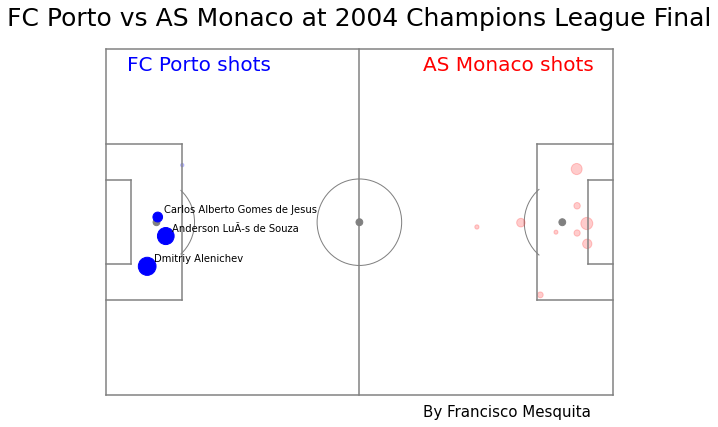

In [16]:
import numpy as np
import matplotlib.pyplot as plt

pitch_width = 120
pitch_height = 80

fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

fig.set_facecolor('white')

home_team = 'AS Monaco'
away_team = 'FC Porto'

for i, shot in shots.iterrows():
    x = shot['location'][0]
    y = shot['location'][1]
    
    goal = shot['shot_outcome_name'] == 'Goal'
    team_name = shot['team_name']
    
    circle_size = 2
    circle_size = np.sqrt(shot['shot_statsbomb_xg'] * 15)
    
    if team_name == home_team:
        if goal:
            shot_circle = plt.Circle((x, pitch_height - y), circle_size, color = 'red')
            plt.text((x + 1.5), pitch_height - y + 1, shot['player_name'])
        else:
            shot_circle = plt.Circle((x, pitch_height - y), circle_size, color = 'red')
            shot_circle.set_alpha(.2)
    elif team_name == away_team:
        if goal:
            shot_circle = plt.Circle((pitch_width - x, y), circle_size, color = 'blue')
            plt.text((pitch_width - x + 1.5), y + 1, shot['player_name'])
        else:
            shot_circle = plt.Circle((pitch_width - x, y), circle_size, color = 'blue')
            shot_circle.set_alpha(.2)
    
    ax.add_patch(shot_circle)
    
plt.text(5, 75, away_team + ' shots', color = 'blue', fontsize = 20)
plt.text(75, 75, home_team + ' shots', color = 'red', fontsize = 20)
plt.text(75, -5, 'By Francisco Mesquita', fontsize = 15)

plt.title('FC Porto vs AS Monaco at 2004 Champions League Final', fontsize = 25)

fig.set_size_inches(10, 7)

plt.show()